# Summary
This demonstrates reconstruction of a Fresnel CDI dataset and compares the result to ePIE reconstruction. 

The probe structure allows reconstruction in CDI mode, i.e. without real-space overlap constraints. 

Scanning CDI reconstruction is also possible here, but results in a lower-quality image because of scan position jitter in this dataset.

## Object ePIE reconstruction: 
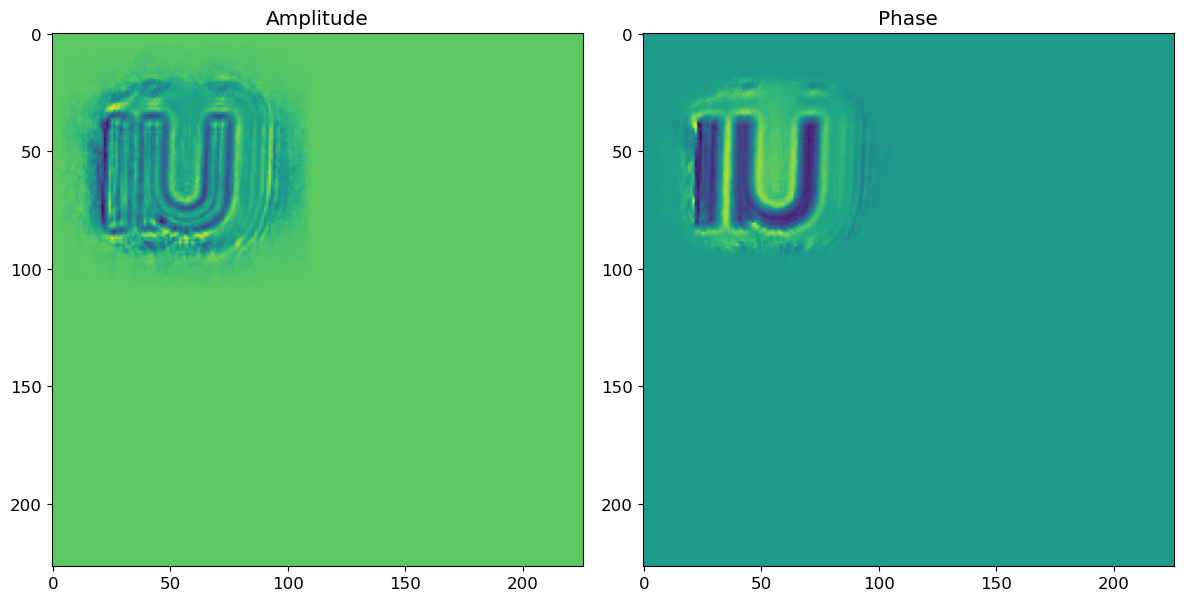

In [1]:
from scipy.ndimage import zoom
import numpy as np

def init():
    from ptycho import params as p
    
    p.cfg['nepochs'] = 50
    p.cfg['output_prefix'] = 'tmp'
    p.cfg['nimgs_train'] = 1
    p.cfg['nimgs_test'] = 1
    p.cfg['intensity_scale.trainable'] = False
    p.cfg['positions.provided'] = True
    p.cfg['probe.big'] = True
    p.cfg['probe.mask'] = False

    p.cfg['data_source'] = 'generic'
    p.cfg['gridsize'] = 1
    p.cfg['probe_scale'] = 5
    p.cfg['train_data_file_path'] = 'train_data.npz'
    p.cfg['test_data_file_path'] = 'test_data.npz'


# IMPORTANT: must call init() BEFORE the dataset definition
init()

In [2]:
!ln -s ../tests/test_generic_loader.py
import test_generic_loader;
train_raw, test_raw = test_generic_loader.test_generic_loader(False);

ln: failed to create symbolic link './test_generic_loader.py': File exists


2024-06-18 23:56:33.655635: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-06-18 23:56:33.655662: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-06-18 23:56:33.656543: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-06-18 23:56:33.661728: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-06-18 23:56:34.217494: W tensorflow/compiler/tf2

2 items had no tests:
    __main__
    __main__.init
0 tests in 2 items.
0 passed and 0 failed.
Test passed.


/home/ollie/anaconda3/envs/py310_3/lib/python3.10/site-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(
2024-06-18 23:56:35.297085: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-06-18 23:56:35.297345: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read fr

diff3d shape: (1087, 64, 64)
probeGuess shape: (64, 64)
scan_index shape: (1087,)
objectGuess shape: (227, 226)
xcoords shape: (1087,)
ycoords shape: (1087,)
xcoords_start shape: (1087,)
ycoords_start shape: (1087,)
diff3d shape: (512, 64, 64)
probeGuess shape: (64, 64)
scan_index shape: (512,)
objectGuess shape: (227, 226)
xcoords shape: (512,)
ycoords shape: (512,)
xcoords_start shape: (512,)
ycoords_start shape: (512,)
raw diffraction shape (64, 64, 1087)
diff3d shape: (1087, 64, 64)
probeGuess shape: (64, 64)
scan_index shape: (1087,)
objectGuess shape: (227, 226)
xcoords shape: (1087,)
ycoords shape: (1087,)
xcoords_start shape: (1087,)
ycoords_start shape: (1087,)
diff3d shape: (512, 64, 64)
probeGuess shape: (64, 64)
scan_index shape: (512,)
objectGuess shape: (227, 226)
xcoords shape: (512,)
ycoords shape: (512,)
xcoords_start shape: (512,)
ycoords_start shape: (512,)
Train data written to train_data.npz
Test data written to test_data.npz
diff3d shape: (512, 64, 64)
probeGuess 

In [3]:
from ptycho import probe
from ptycho import params as p

from ptycho.xpp import *
probe_amp = np.absolute(probeGuess)
mask = np.absolute(p.get('probe_mask'))[:, :, 0, 0]
# probe.set_probe_guess(None, probeGuess)
probeGuess = probe.pp_probe_guess(probeGuess)

from ptycho.evaluation import save_metrics
from ptycho.evaluation import trim
from ptycho import tf_helper as hh

In [4]:
p.cfg['intensity_scale.trainable']

False

In [5]:
tf.random.set_seed(44)
np.random.seed(44)
from ptycho import params as p
from ptycho import train, model
from ptycho.train import *
from ptycho.nbutils import *

ptycho_dataset, YY_ground_truth, YY_test_full, Y_I_test, Y_phi_test, X_test,\
    norm_Y_I_test, history, reconstructed_obj, stitched_obj, d, model_instance, cfg = main(p.cfg, probeGuess)

# channel dimensions size should be 1 in CDI mode, 4 in ptycho mode
ptycho_dataset.test_data.X.shape, ptycho_dataset.train_data.X.shape

diff3d shape: (512, 64, 64)
probeGuess shape: (64, 64)
scan_index shape: (512,)
objectGuess shape: (227, 226)
xcoords shape: (512,)
ycoords shape: (512,)
xcoords_start shape: (512,)
ycoords_start shape: (512,)
diff3d shape: (1087, 64, 64)
probeGuess shape: (64, 64)
scan_index shape: (1087,)
objectGuess shape: (227, 226)
xcoords shape: (1087,)
ycoords shape: (1087,)
xcoords_start shape: (1087,)
ycoords_start shape: (1087,)
DEBUG: nsamples: 1
neighbor-sampled diffraction shape (512, 64, 64, 1)
DEBUG: nsamples: 1
neighbor-sampled diffraction shape (1087, 64, 64, 1)
INFO: None
<PtychoDataContainer X=(512, 64, 64, 1) Y_I=(512, 64, 64, 1) Y_phi=(512, 64, 64, 1) norm_Y_I=() coords_nominal=(512, 1, 2, 1) coords_true=(512, 1, 2, 1) nn_indices=(512, 1) mean=255.500 global_offsets=(512, 1, 2, 1) mean=63.009 local_offsets=(512, 1, 2, 1) mean=0.000 probe=(64, 64, 1)>
INFO: None
<PtychoDataContainer X=(1087, 64, 64, 1) Y_I=(1087, 64, 64, 1) Y_phi=(1087, 64, 64, 1) norm_Y_I=() coords_nominal=(1087, 1

2024-06-18 23:56:45.168114: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8904
2024-06-18 23:56:45.168614: I tensorflow/core/util/cuda_solvers.cc:179] Creating GpuSolver handles for stream 0x604bb72f5690
2024-06-18 23:56:46.432934: I external/local_xla/xla/service/service.cc:168] XLA service 0x7a12a8fbcc60 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-06-18 23:56:46.432958: I external/local_xla/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce RTX 3090, Compute Capability 8.6
2024-06-18 23:56:46.436199: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1718769406.500382  873500 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


31/31 [==============================] - 9s 79ms/step - loss: 400081344.0000 - trimmed_obj_loss: 0.0000e+00 - tf.math.multiply_loss: 154.9534 - distribution_lambda_loss: 400081344.0000 - val_loss: 305730944.0000 - val_trimmed_obj_loss: 0.0000e+00 - val_tf.math.multiply_loss: 133.0577 - val_distribution_lambda_loss: 305730944.0000 - lr: 0.0010
Epoch 2/50
31/31 [==============================] - 0s 11ms/step - loss: 264663856.0000 - trimmed_obj_loss: 0.0000e+00 - tf.math.multiply_loss: 128.1545 - distribution_lambda_loss: 264663856.0000 - val_loss: 224279712.0000 - val_trimmed_obj_loss: 0.0000e+00 - val_tf.math.multiply_loss: 119.2748 - val_distribution_lambda_loss: 224279712.0000 - lr: 0.0010
Epoch 3/50
31/31 [==============================] - 0s 11ms/step - loss: 201394512.0000 - trimmed_obj_loss: 0.0000e+00 - tf.math.multiply_loss: 112.7606 - distribution_lambda_loss: 201394512.0000 - val_loss: 144735008.0000 - val_trimmed_obj_loss: 0.0000e+00 - val_tf.math.multiply_loss: 95.0403 - va

(TensorShape([1087, 64, 64, 1]), TensorShape([512, 64, 64, 1]))

In [5]:
p.cfg['intensity_scale']

<tf.Tensor: shape=(), dtype=float64, numpy=1082.2115567386122>

# Dataset description

In [9]:
test_data = ptycho_dataset.test_data
train_data = ptycho_dataset.train_data

34/34 [==============================] - 0s 5ms/step
PADDING SIZE: 23
PADDING SIZE: 23


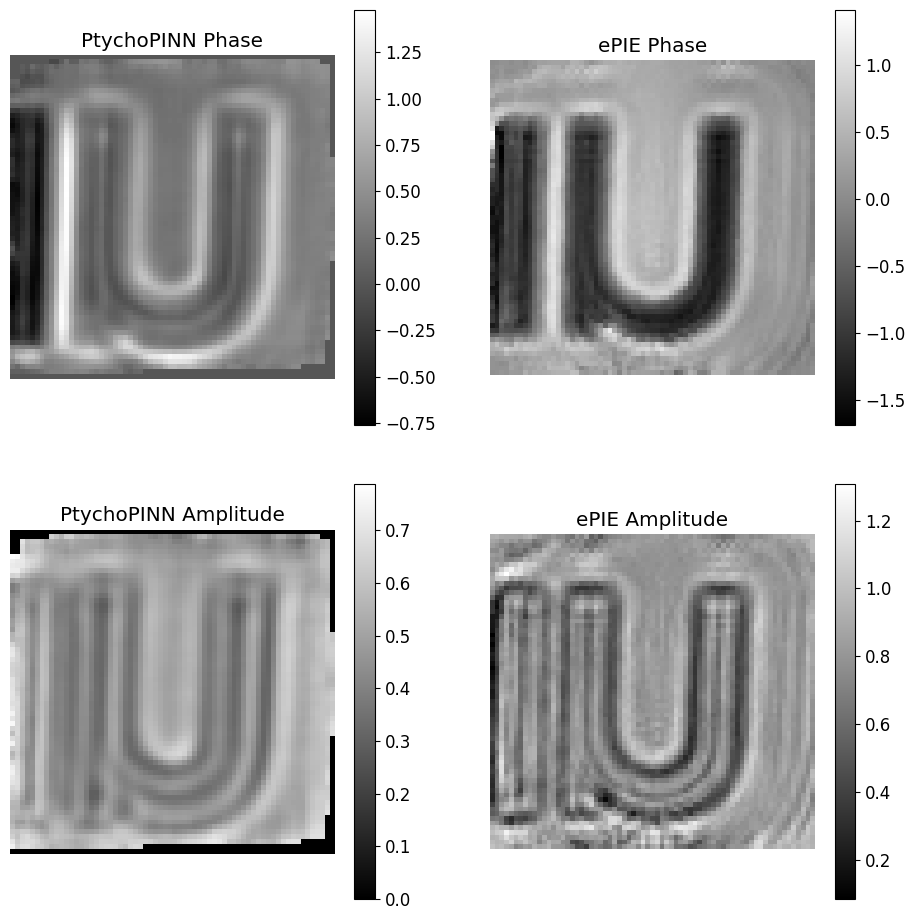

In [10]:
test_data = ptycho_dataset.test_data
train_data = ptycho_dataset.train_data

from ptycho.nbutils import reconstruct_image, crop_to_non_uniform_region_with_buffer, mk_epie_comparison2x2
# %%time
obj_tensor_full, global_offsets = reconstruct_image(test_data, model_instance)
obj_image = loader.reassemble_position(obj_tensor_full, global_offsets[:, :, :, :], M = 20)

recon_amp_ptychopinn = np.absolute(obj_image)
recon_phase_ptychopinn = np.angle(obj_image)

ptycho_pinn_phase = recon_phase_ptychopinn[..., 0]
ptycho_pinn_amplitude = recon_amp_ptychopinn[..., 0]

epie_phase = crop_to_non_uniform_region_with_buffer(np.angle(obj['objectGuess']), buffer=-20)
epie_amplitude = crop_to_non_uniform_region_with_buffer(np.absolute(obj['objectGuess']), buffer=-20)

mk_epie_comparison2x2(ptycho_pinn_phase, epie_phase, ptycho_pinn_amplitude,epie_amplitude)

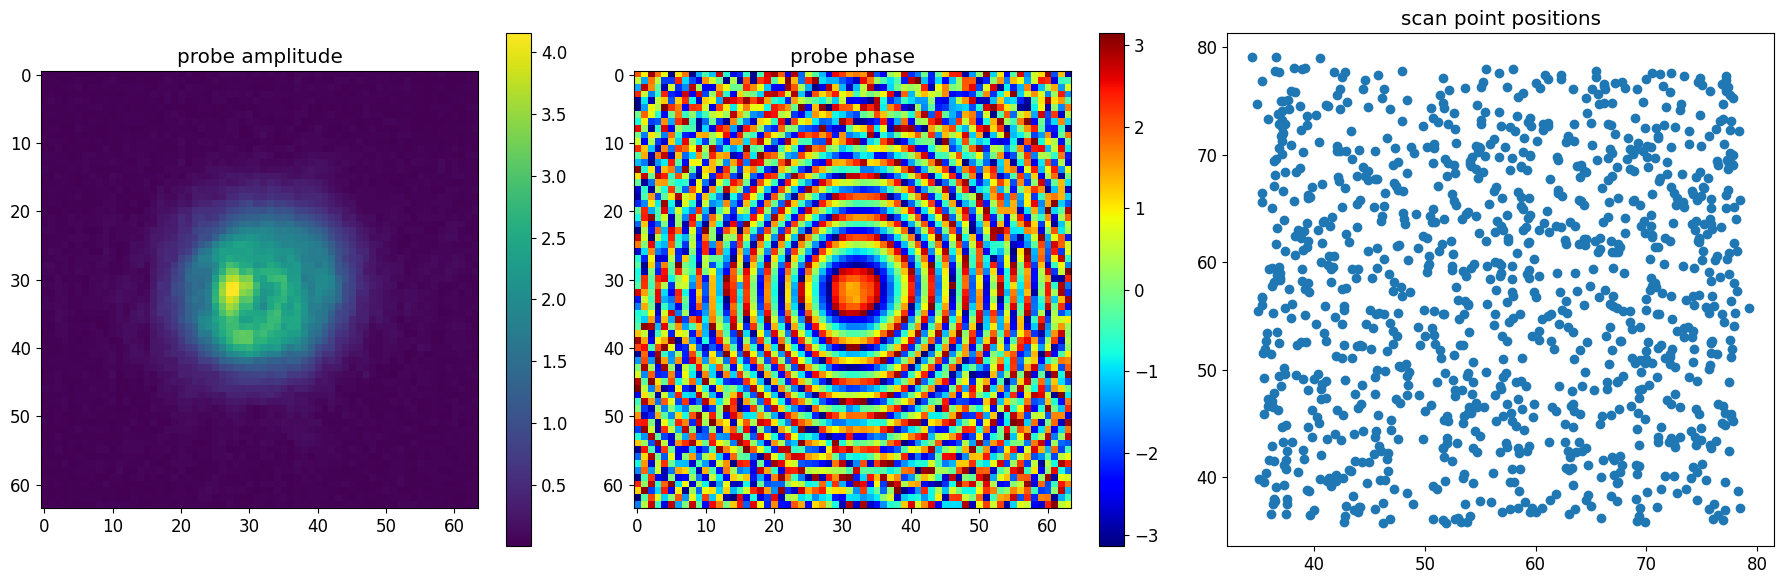

In [11]:
# Note the randomized scan point positions
probeshow(probeGuess, ptycho_dataset.test_data)

## Reconstruct the full test object image and compare to the ePIE reconstruction:

In [14]:
print(model_instance['autoencoder'].summary())

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input (InputLayer)          [(None, 64, 64, 1)]          0         []                            
                                                                                                  
 tf.math.truediv (TFOpLambd  (None, 64, 64, 1)            0         ['input[0][0]']               
 a)                                                                                               
                                                                                                  
 conv2d (Conv2D)             (None, 64, 64, 64)           640       ['tf.math.truediv[0][0]']     
                                                                                                  
 conv2d_1 (Conv2D)           (None, 64, 64, 64)           36928     ['conv2d[0][0]']          

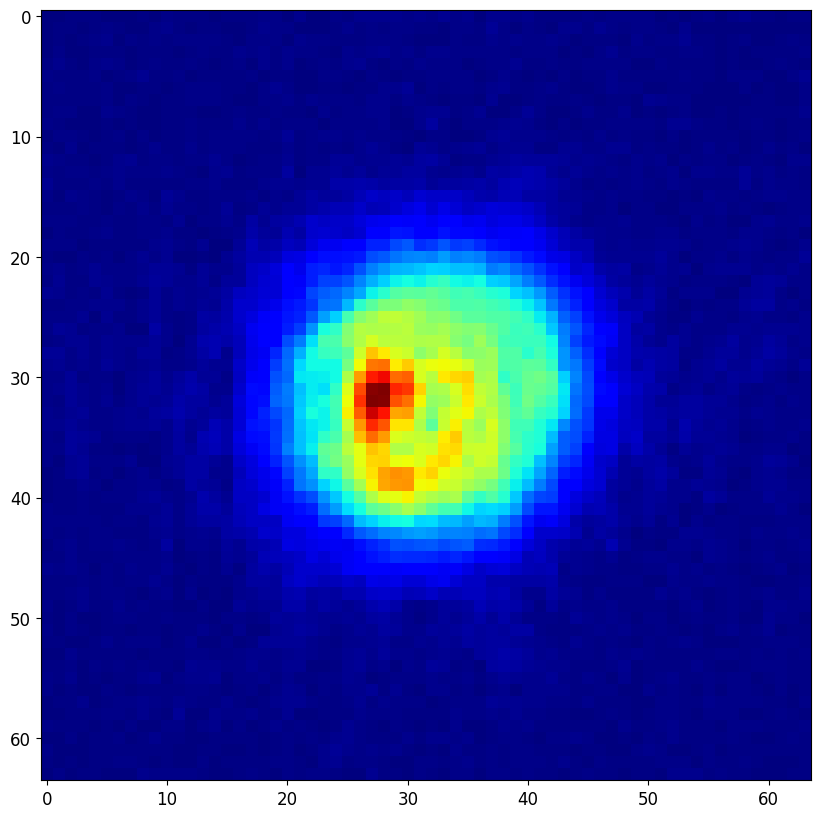

In [16]:
plt.imshow(np.absolute(model_instance['autoencoder'].variables[-1]), cmap = 'jet')


<ptycho.tf_helper.reassemble_patches_position_real.reassemble_patches_position_real>CALL
type=<class 'tensorflow.python.framework.ops.SymbolicTensor'>, shape=(None, 64, 64, 1), dtype=<dtype: 'float32'>
type=<class 'dict'>
<ptycho.tf_helper.reassemble_patches_position_real.reassemble_patches_position_real>ERROR Input data is not picklable
<ptycho.tf_helper.reassemble_patches_position_real.reassemble_patches_position_real>CALL
type=<class 'tensorflow.python.framework.ops.SymbolicTensor'>, shape=(None, 64, 64, 1), dtype=<dtype: 'float32'>
type=<class 'dict'>
<ptycho.tf_helper.reassemble_patches_position_real.reassemble_patches_position_real>ERROR Input data is not picklable
34/34 [==============================] - 0s 5ms/step
<ptycho.loader.reassemble_position.reassemble_position>CALL
type=<class 'numpy.ndarray'>, shape=(1087, 64, 64, 1), dtype=complex64, type=<class 'numpy.ndarray'>, shape=(1087, 1, 2, 1), dtype=float64
type=<class 'dict'>
<ptycho.loader.shift_and_sum.shift_and_sum>CALL


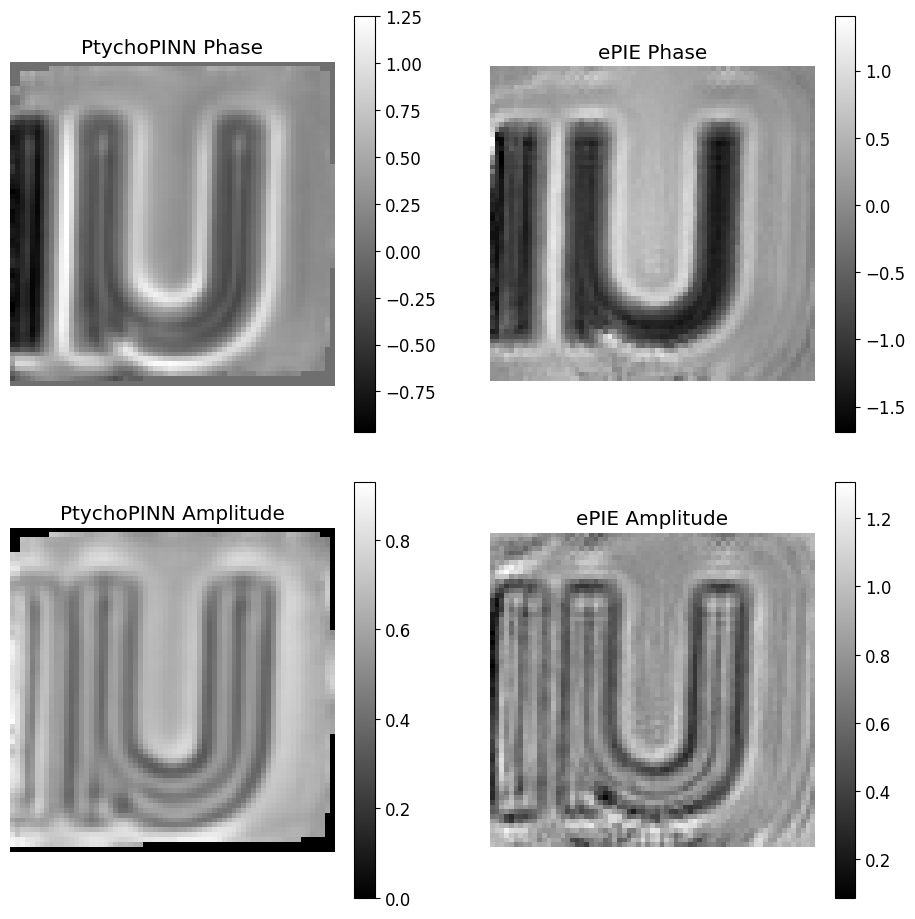

CPU times: user 6.02 s, sys: 967 ms, total: 6.98 s
Wall time: 6.6 s


In [11]:
%%time
obj_tensor_full, global_offsets = reconstruct_image(test_data)
obj_image = loader.reassemble_position(obj_tensor_full, global_offsets[:, :, :, :], M = 20)

recon_amp_ptychopinn = np.absolute(obj_image)
recon_phase_ptychopinn = np.angle(obj_image)

ptycho_pinn_phase = recon_phase_ptychopinn[..., 0]
ptycho_pinn_amplitude = recon_amp_ptychopinn[..., 0]

epie_phase = crop_to_non_uniform_region_with_buffer(np.angle(obj['objectGuess']), buffer=-20)
epie_amplitude = crop_to_non_uniform_region_with_buffer(np.absolute(obj['objectGuess']), buffer=-20)

mk_epie_comparison2x2(ptycho_pinn_phase, epie_phase, ptycho_pinn_amplitude,epie_amplitude)

Reconstruction for a single solution region:

phase min: -3.1356168 phase max: 3.130879


/home/ollie/anaconda3/envs/py310_3/lib/python3.10/site-packages/ptycho/evaluation.py:80: RuntimeWarning: divide by zero encountered in log
  true_diffraction = np.log(X_test)[i, :, :, channel]


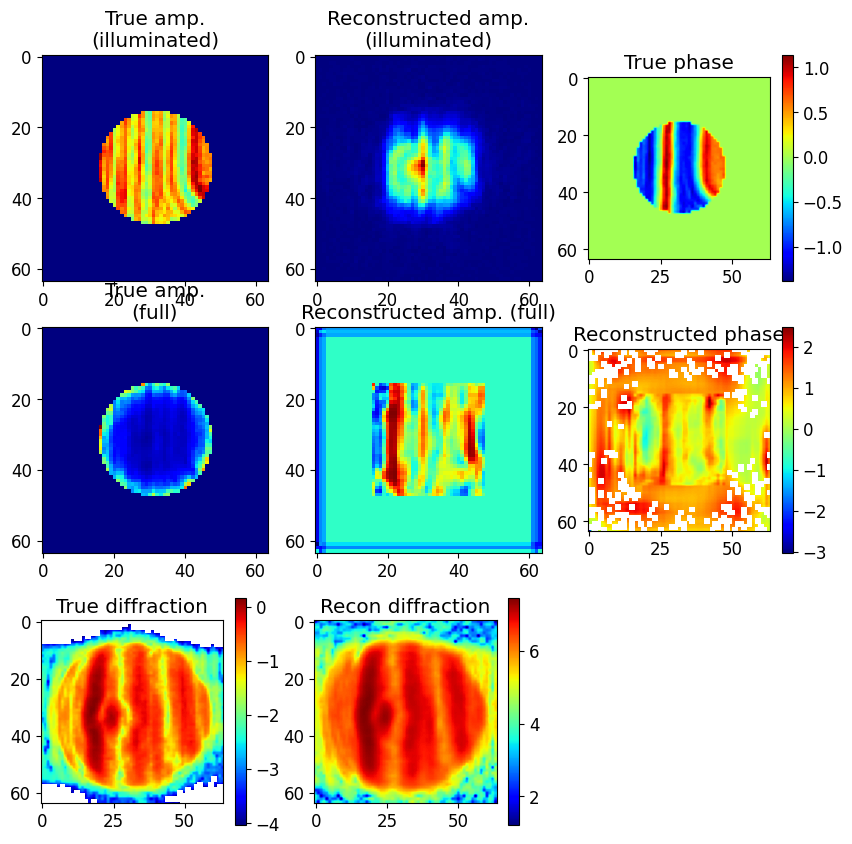

In [17]:
i = 400
from ptycho import evaluation
evaluation.summarize(i, model_instance['pred_amp'] + 1, reconstructed_obj, X_test, Y_I_test, Y_phi_test,
                     np.absolute(p.get('probe')[:, :, 0, 0]), 0,
                    crop = False);

In [ ]:
# TODO: is the loss different here from on the main branch?

In [17]:
from importlib import reload

In [68]:
reload(loader)

<module 'ptycho.loader' from '/home/ollie/anaconda3/envs/py310_3/lib/python3.10/site-packages/ptycho/loader.py'>

In [ ]:
from importlib import 

In [24]:
from ptycho.loader import reassemble_position
from ptycho.nbutils import reconstruct_image

PAD = 35
cm = tf.cast(tf.convert_to_tensor(np.array([[[57.08387053], [57.40052498]]])), tf.float32)


def batch_iterator(test_data, batch_size):
    num_samples = test_data.X.shape[0]
    for i in range(0, num_samples, batch_size):
        batch_data = test_data[i:i+batch_size]
        obj_tensor_full, global_offsets = reconstruct_image(batch_data, model_instance)
        obj_image = reassemble_position(obj_tensor_full, global_offsets[:, :, :, :], M=20, pad=PAD, cm=cm)
        yield (obj_image, global_offsets)
   
def live_reconstruction(iterator):
    import numpy as np
    import matplotlib.pyplot as plt
    from matplotlib.animation import FuncAnimation
    from IPython.display import display
    from tqdm.notebook import tqdm
    import sys
    import os
    import tensorflow as tf
    from ptycho.loader import reassemble_position
    from ptycho.nbutils import reconstruct_image

    M = 20
    canvas = np.zeros((M + PAD * 2, M + PAD * 2))
    normalization = np.ones_like(canvas)
    
    # batch_size = 50
    cm = tf.cast(tf.convert_to_tensor(np.array([[[57.08387053], [57.40052498]]])), tf.float32)    
    
    canvas_amplitude = np.zeros((M + PAD * 2, M + PAD * 2))
    canvas_phase = np.zeros((M + PAD * 2, M + PAD * 2))
    normalization = np.ones_like(canvas_amplitude)
    
    
    def update_image(frame, iterator):
        nonlocal canvas_amplitude, canvas_phase, normalization
        try:
            batch = next(iterator)
            obj_image, global_offsets = batch
            increment_amplitude = np.abs(obj_image)[..., 0]
            increment_phase = np.angle(obj_image)[..., 0]
            canvas_amplitude += increment_amplitude
            canvas_phase += increment_phase
            normalization += (increment_amplitude > 0)
            im_amplitude.set_data(canvas_amplitude / normalization)
            im_phase.set_data(canvas_phase / normalization)
        except StopIteration:
            ani.event_source.stop()
    
    fig, (ax_amplitude, ax_phase) = plt.subplots(1, 2, figsize=(12, 6))
    
    im_amplitude = ax_amplitude.imshow(canvas_amplitude / normalization, cmap='viridis', interpolation='none', vmax=.8)
    ax_amplitude.set_title('Amplitude')
    plt.colorbar(im_amplitude, ax=ax_amplitude)
    
    im_phase = ax_phase.imshow(canvas_phase / normalization, cmap='twilight', interpolation='none', vmax=2, vmin=-2)
    ax_phase.set_title('Phase')
    plt.colorbar(im_phase, ax=ax_phase)
    
    ani = FuncAnimation(fig, update_image, fargs=(iterator,), frames=tqdm(range(1000), desc="Reconstructing Batches"), repeat=False)

    plt.show()


Reconstructing Batches:   0%|          | 0/1000 [00:00<?, ?it/s]

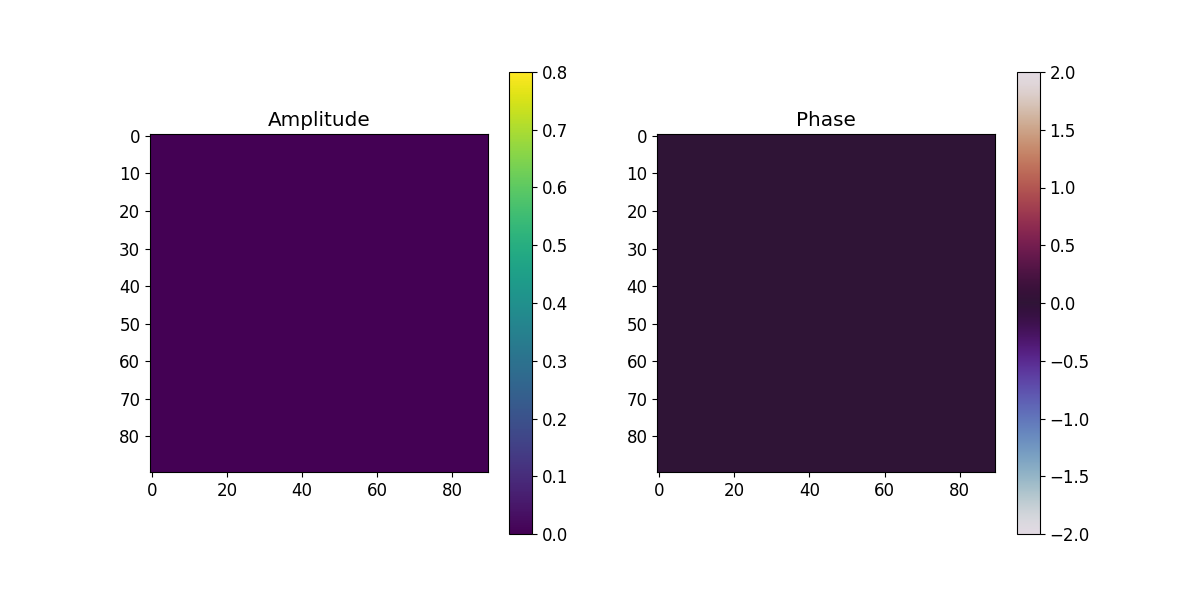

In [26]:
%matplotlib widget
batch_size = 100
live_reconstruction(
    batch_iterator(test_data, batch_size)
)